In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (12, 12)

from gb import gbio

import matplotlib.colors as colors
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
top_100 = pd.read_csv('./datasets/data/parsed/df_09-01.t.csv.top100')
names = []
inames = {}
with open('./ticks.dat') as ticks:
    for line in ticks:
        names.append(line.split()[0])
        inames[line.split()[0]] = len(inames)

In [3]:
model = gbio.load_model('./first_model_beta0.npz')
model

In [4]:
model.Alpha_

<69x69 sparse matrix of type '<class 'numpy.uint64'>'
	with 445 stored elements in Compressed Sparse Row format>

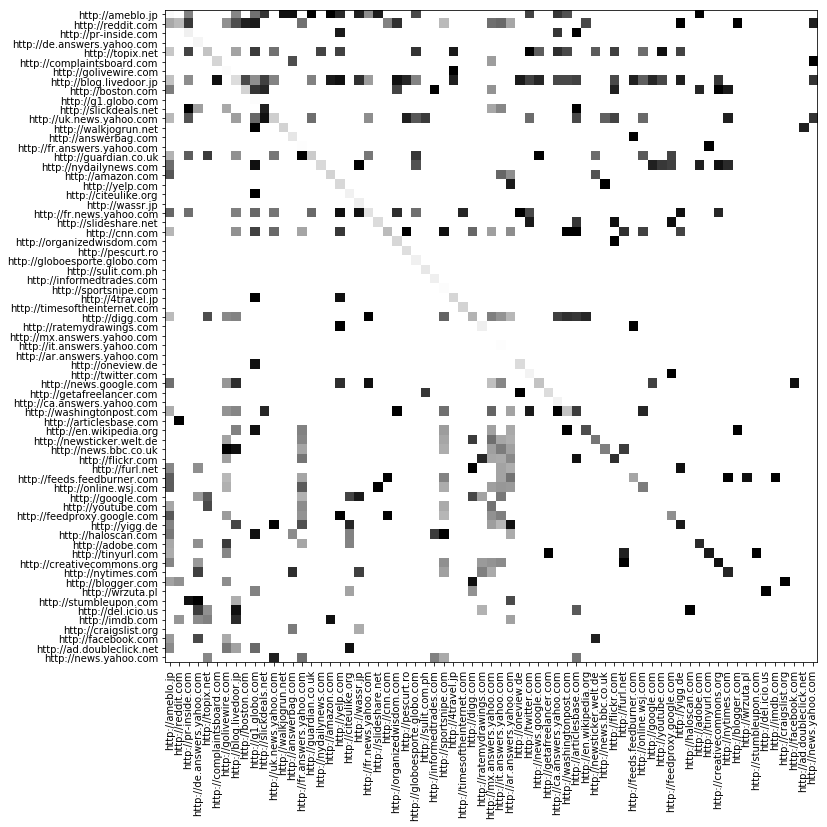

In [5]:
plt.imshow(model.Alpha_.toarray(),
           norm=colors.LogNorm(), cmap=plt.cm.gray)
plt.xticks(np.arange(len(names)), names, rotation=90)
plt.yticks(np.arange(len(names)), names)
plt.show()

In [7]:
n = len(names)
GT = np.zeros(shape=(n, n), dtype='i')
for row in top_100[['Blog', 'Hyperlink']].values:
    if row[0] in inames and row[1] in inames:
        GT[inames[row[0]], inames[row[1]]] += 1

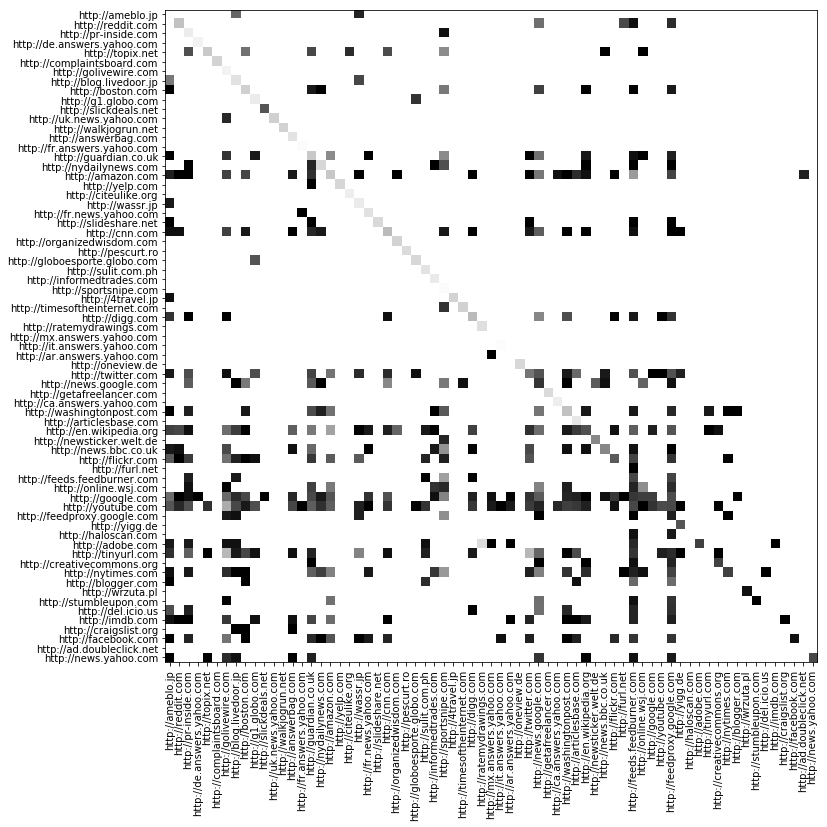

In [8]:
plt.imshow(GT.T,
           norm=colors.LogNorm(), cmap=plt.cm.gray)
plt.xticks(np.arange(len(names)), names, rotation=90)
plt.yticks(np.arange(len(names)), names)
plt.show()

In [13]:
from scipy.stats import kendalltau
ts = []
for i in range(n):
    t = kendalltau(GT.T[i], model.Alpha_.toarray()[i])[0]
    if not np.isnan(t):
        ts.append(t)

In [14]:
np.mean(ts)

0.37434205437677809